<a href="https://colab.research.google.com/github/nicobargioni/machine-learning/blob/main/Nicolas_Bargioni_Desafio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafío de Clustering

Dataset: Cervical Cancer Behavior Risk

URL: https://archive.ics.uci.edu/dataset/537/cervical+cancer+behavior+risk

Descripción: el dataset se llama Cervical Cancer Behavior Risk. Está orientado a analizar y clasificar el riesgo de cáncer de cuello uterino basado en datos de factores de comportamiento y psicosociales. El objetivo será hacer clustering para identificar grupos de personas que comparten comportamientos, actitudes y percepciones similares en relación con el riesgo de desarrollar cáncer de cuello uterino.



In [46]:
#Instalo las librerías
!pip install ucimlrepo
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [57]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_behavior_risk = fetch_ucirepo(id=537)

# data (as pandas dataframes)
X = cervical_cancer_behavior_risk.data.features
y = cervical_cancer_behavior_risk.data.targets

# metadata
print(cervical_cancer_behavior_risk.metadata)

# variable information
print(cervical_cancer_behavior_risk.variables)

{'uci_id': 537, 'name': 'Cervical Cancer Behavior Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/537/cervical+cancer+behavior+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/537/data.csv', 'abstract': 'The dataset contains 19 attributes regarding ca cervix behavior risk with class label is ca_cervix with 1 and 0 as values which means the respondent with and without ca cervix, respectively.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Univariate'], 'num_instances': 72, 'num_features': 19, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['ca_cervix'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5402W', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommende

#EDA

In [58]:
#Creo el dataset sin la variable target para que no se sesgue el modelo
df = X
df.head()

,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk
0,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,10
1,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,10
2,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,10
3,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,10
4,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,8


In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

In [61]:
import umap

# Reducir a 2 dimensiones para visualización
reducer_2d = umap.UMAP(n_components=2, random_state=42)
features_umap_2d = reducer_2d.fit_transform(features_scaled)

# Reducir a 5 dimensiones para clustering
reducer_5d = umap.UMAP(n_components=5, random_state=42)
features_umap_5d = reducer_5d.fit_transform(features_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


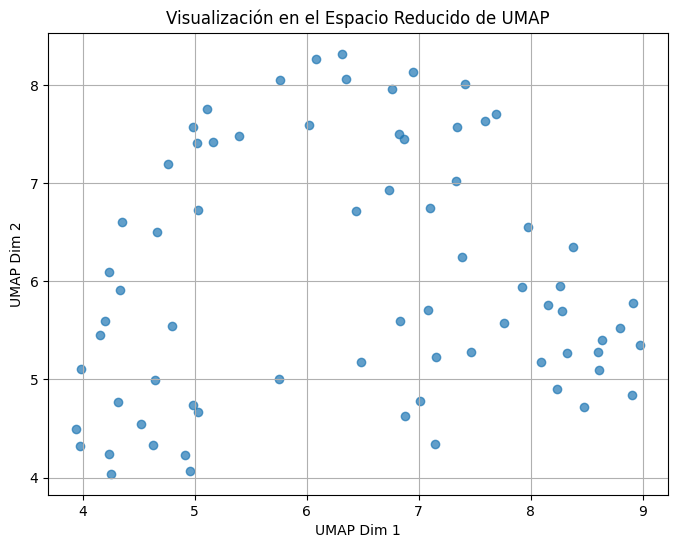

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features_umap_2d[:, 0], features_umap_2d[:, 1], alpha=0.7)
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.title('Visualización en el Espacio Reducido de UMAP')
plt.grid(True)
plt.show()


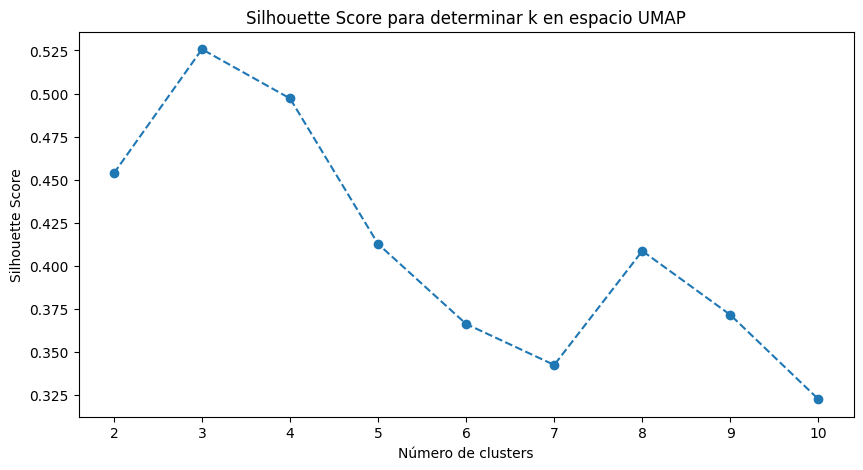

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Probar diferentes valores de k para K-means en el espacio UMAP de 5 dimensiones
range_n_clusters = range(2, 11)
silhouette_scores_umap = []

for k in range_n_clusters:
    kmeans_umap = KMeans(n_clusters=k, random_state=42)
    kmeans_umap_labels = kmeans_umap.fit_predict(features_umap_5d)
    silhouette_scores_umap.append(silhouette_score(features_umap_5d, kmeans_umap_labels))

# Graficar Silhouette Score para UMAP
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores_umap, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar k en espacio UMAP')
plt.show()

#Clusterización con k-means

In [68]:
# Clustering final con el número óptimo de clusters
optimal_k = 3
kmeans_umap_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_umap_labels_final = kmeans_umap_final.fit_predict(features_umap_5d)

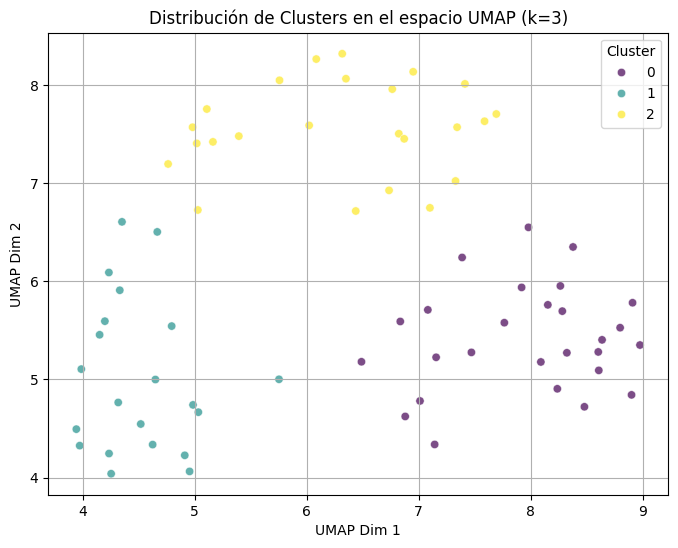

In [70]:
import seaborn as sns

# Crear un DataFrame para visualización
umap_df = pd.DataFrame(features_umap_2d, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = kmeans_umap_labels_final

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', alpha=0.7)
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.title(f'Distribución de Clusters en el espacio UMAP (k={optimal_k})')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [73]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ca_cervix  72 non-null     int64
dtypes: int64(1)
memory usage: 704.0 bytes


In [125]:
# Convertir y a una dimensión
y_flat = y.squeeze()  # O usa y.values.ravel() si prefieres un array de NumPy

# Crear un DataFrame temporal para el análisis de clusters
cluster_df = pd.DataFrame({
    'Cluster': kmeans_umap_labels_final,
    'ca_cervix': y_flat
})

# Realizar el análisis de la distribución de ca_cervix dentro de cada cluster
cluster_analysis = cluster_df.groupby('Cluster')['ca_cervix'].value_counts(normalize=True).unstack()

In [126]:
print("Distribución de 'ca_cervix' en cada cluster hecho con k-means:")
print(cluster_analysis)

Distribución de 'ca_cervix' en cada cluster hecho con k-means:
ca_cervix         0         1
Cluster                      
0          0.814815  0.185185
1          1.000000       NaN
2          0.333333  0.666667


#Clusterizo con DBSCAN

In [127]:
#Vuelvo a cargar el dataset sin la variable de clase
df = X
df.head()

,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,...,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,cluster,tsne_1,tsne_2
0,13,12,4,7,9,10,1,8,7,3,...,5,7,12,12,11,8,10,0,1.486194,-0.200342
1,11,11,10,14,7,7,5,5,4,2,...,7,6,5,5,4,4,10,0,-0.122637,-0.463823
2,15,3,2,14,8,10,1,4,7,2,...,3,6,11,3,3,15,10,0,-1.578776,-2.837080
3,11,10,10,15,7,7,1,5,4,2,...,7,4,4,4,4,4,10,0,-0.085991,-0.677988
4,11,7,8,10,7,8,1,5,3,2,...,3,6,12,5,4,7,8,0,-0.680912,-1.815731


In [128]:
#Escalo las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [129]:
# Reducir a 5 dimensiones para clustering
reducer_5d = umap.UMAP(n_components=5, random_state=42)
X_umap_5d = reducer_5d.fit_transform(X_scaled)

# Reducir a 2 dimensiones para visualización
reducer_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = reducer_2d.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [130]:
from sklearn.cluster import DBSCAN

# Rango de valores para eps y min_samples
eps_values = np.arange(0.3, 1.2, 0.1)
min_samples_values = range(3, 10)

best_silhouette = -1  # Para rastrear el mejor Silhouette Score
best_params = {'eps': None, 'min_samples': None}
best_labels = None

# Búsqueda de hiperparámetros para DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_umap_5d)

        # Verificar si hay al menos 2 clusters válidos
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            # Calcular Silhouette Score excluyendo puntos de ruido
            score = silhouette_score(X_umap_5d[labels != -1], labels[labels != -1])
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score:.2f}")

            # Guardar los mejores parámetros
            if score > best_silhouette:
                best_silhouette = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels

# Mostrar los mejores hiperparámetros y el mejor Silhouette Score
print(f"\nMejor Silhouette Score: {best_silhouette:.2f}")
print(f"Mejores Parámetros: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")

eps: 0.4, min_samples: 3, Silhouette Score: 0.50
eps: 0.4, min_samples: 4, Silhouette Score: 0.64
eps: 0.5, min_samples: 3, Silhouette Score: 0.39
eps: 0.5, min_samples: 4, Silhouette Score: 0.58
eps: 0.5, min_samples: 5, Silhouette Score: 0.83
eps: 0.6000000000000001, min_samples: 3, Silhouette Score: 0.38
eps: 0.6000000000000001, min_samples: 4, Silhouette Score: 0.46
eps: 0.6000000000000001, min_samples: 5, Silhouette Score: 0.52
eps: 0.6000000000000001, min_samples: 6, Silhouette Score: 0.64
eps: 0.6000000000000001, min_samples: 7, Silhouette Score: 0.80
eps: 0.6000000000000001, min_samples: 8, Silhouette Score: 0.80
eps: 0.7000000000000002, min_samples: 5, Silhouette Score: 0.57
eps: 0.7000000000000002, min_samples: 6, Silhouette Score: 0.59
eps: 0.7000000000000002, min_samples: 7, Silhouette Score: 0.58
eps: 0.7000000000000002, min_samples: 8, Silhouette Score: 0.54
eps: 0.7000000000000002, min_samples: 9, Silhouette Score: 0.81
eps: 0.8000000000000003, min_samples: 5, Silhouette

In [131]:
# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_final = dbscan_final.fit_predict(X_umap_5d)

# Imprimir los parámetros utilizados y el número de clusters encontrados
print(f"Aplicando DBSCAN con eps = {best_params['eps']} y min_samples = {best_params['min_samples']}")
n_clusters = len(set(labels_final)) - (1 if -1 in labels_final else 0)
print(f"Número de clusters encontrados (excluyendo ruido): {n_clusters}")

Aplicando DBSCAN con eps = 0.5 y min_samples = 5
Número de clusters encontrados (excluyendo ruido): 3


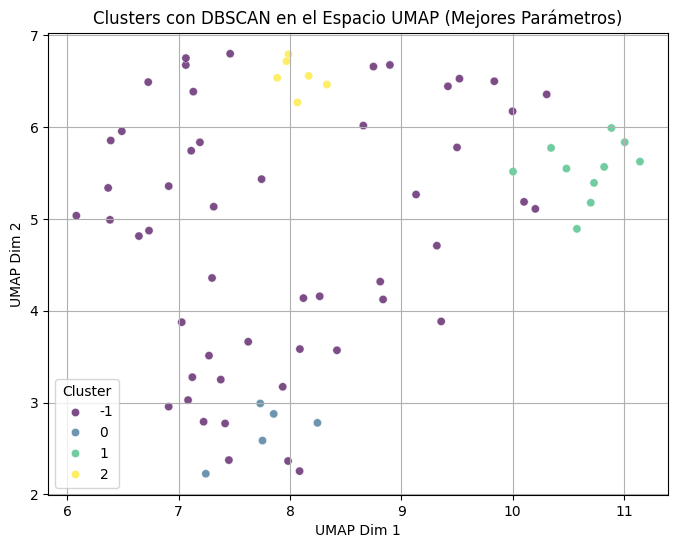

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame para visualización
dbscan_df = pd.DataFrame(X_umap_2d, columns=['UMAP1', 'UMAP2'])
dbscan_df['Cluster'] = labels_final

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dbscan_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', alpha=0.7)
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.title('Clusters con DBSCAN en el Espacio UMAP (Mejores Parámetros)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [133]:
# Crear un DataFrame para el análisis de clusters con `ca_cervix`
dbscan_analysis_df = pd.DataFrame({
    'Cluster': labels_final,
    'ca_cervix': y.values.ravel()  # Asegúrate de que `y` es 1D si es necesario
})

# Análisis de la distribución de `ca_cervix` dentro de cada cluster, excluyendo el ruido (-1)
cluster_analysis_dbscan = dbscan_analysis_df[dbscan_analysis_df['Cluster'] != -1].groupby('Cluster')['ca_cervix'].value_counts(normalize=True).unstack()
print("Distribución de 'ca_cervix' en cada cluster hecho con DBSCAN (excluyendo ruido):")
print(cluster_analysis_dbscan)

Distribución de 'ca_cervix' en cada cluster hecho con DBSCAN (excluyendo ruido):
ca_cervix    0
Cluster       
0          1.0
1          1.0
2          1.0


#CONCLUSIONES


##Clusterización con k-means

El análisis de clustering con K-means mostró una distribución más diversa de los casos ca_cervix = 1 en los clusters.

* En el Cluster 0, aproximadamente el 18.5% de las observaciones corresponden a casos de cáncer cervical (ca_cervix = 1), mientras que el 81.5% restante corresponde a ca_cervix = 0.

* En el Cluster 2, la situación es inversa, ya que los casos de cáncer cervical representan una mayor proporción, con un 66.7% de ca_cervix = 1, en comparación con el 33.3% de ca_cervix = 0.

* El Cluster 1 contiene únicamente casos ca_cervix = 0, indicando que K-means ha logrado separar un grupo específico sin casos de cáncer.

Estos resultados sugieren que K-means FUE CAPAZ de capturar cierta variabilidad en los casos de ca_cervix = 1, distribuyéndolos en clusters donde no son considerados "ruido" y permitiendo una identificación parcial de patrones.

La distribución mixta en los clusters indica que los casos de cáncer no están completamente aislados, sino que coexisten con ca_cervix = 0 en determinados grupos. Esto sugiere que los casos de cáncer pueden estar más cercanos entre sí en el espacio de características, pero no son lo suficientemente densos como para formar un cluster completamente separado.

##Clusterización con DBSCAN

Los clusters identificados contienen exclusivamente casos de ca_cervix = 0, con una proporción del 100% en los clusters 0, 1 y 2. Esto significa que DBSCAN **no ha logrado identificar clusters** que incluyan casos de ca_cervix = 1, probablemente porque estos casos están demasiado dispersos en el espacio de características y no forman agrupaciones densas.

Es probable que DBSCAN haya clasificado los casos de ca_cervix = 1 como "ruido", lo que impide que se identifiquen en clusters específicos.

Este resultado indica que **DBSCAN fue adecuado para identificar patrones en los casos de ca_cervix = 1 en este dataset**, ya que estos puntos no cumplen con los requisitos de densidad del algoritmo.